### The objective of this data exploration
1. Presents the amount of brands from each countries
2. Presents the popular styles of ramen in each country
3. Find the average ramen stars in each brand
4. Create word cloud of product name for the top 100 and the bottom 100 ramen products

In [1]:
# Import file and packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt     # for visualisation
import seaborn as sns     # for visualisation
from wordcloud import WordCloud    # for create word cloud
import random    # for use in random color in word cloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ramen_data = pd.read_csv('/kaggle/input/ramen-ratings/ramen-ratings.csv')

/kaggle/input/ramen-ratings/ramen-ratings.csv


### View the dataset

In [2]:
# View head
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
# Summarise ramen data
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


note: 'Stars' is not numeric

In [4]:
# View the type of Stars column
print(ramen_data['Stars'].describe())

count     2580
unique      51
top          4
freq       384
Name: Stars, dtype: object


In [5]:
# Convert 'Stars' column to int
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors = 'coerce')
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,41
unique,NaN,355,2413,7,38,NaN,38
top,NaN,Nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1531,352,NaN,4
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


Some brands in the Brand column have inconsistant in upper and lower case.

In [6]:
# Convert brand to lower case
ramen_data['Brand'] = ramen_data['Brand'].str.lower()
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,new touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,just way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,wei lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,ching's secret,Singapore Curry,Pack,India,3.75,NaN


### 1. The amount of brands and varieties from each countries

In [7]:
# Count the amount of brand that got review
ramen_brand = ramen_data.groupby(['Brand','Country']).agg({'Review #':'count'})
ramen_brand = ramen_brand.reset_index() 
ramen_brand = ramen_brand.sort_values('Review #', ascending = False)

In [8]:
# Count brand from each country that got review
ramen_coun = ramen_brand.groupby('Country').agg({'Brand':'count'}).reset_index()
ramen_coun = ramen_coun.rename(columns = {'Brand':'Amount of brand'})
ramen_coun = ramen_coun.sort_values(['Amount of brand', 'Country'], ascending = [False, True])

In [9]:
# View the top 10 countries which have the most amount of ramen brand
ramen_coun.head(10)

,Country,Amount of brand
18,Japan,58
35,USA,49
32,Taiwan,47
30,South Korea,35
5,China,33
19,Malaysia,32
33,Thailand,24
17,Indonesia,19
37,Vietnam,19
14,Hong Kong,12


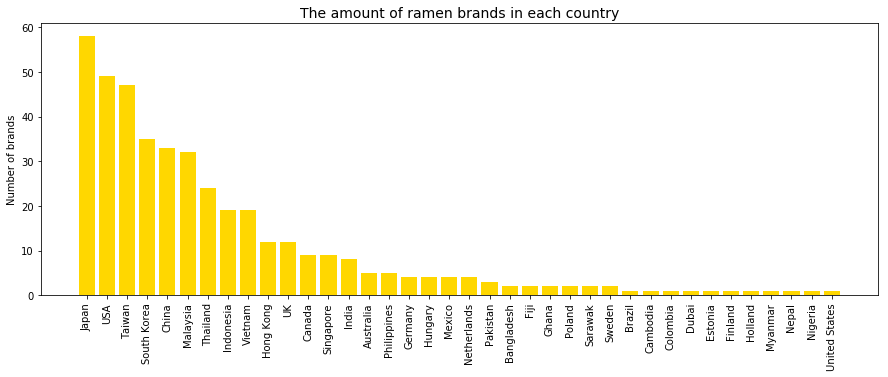

In [10]:
# Bar chart of the amount of ramen brands in each country that got review
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Amount of brand', data = ramen_coun, color = 'gold')
plt.title( 'The amount of ramen brands in each country', fontsize=14)
plt.ylabel('Number of brands')
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Present the variety of each countries that got reviewed
ramen_variety = ramen_data.groupby(['Country']).agg({'Variety':'count'})
ramen_variety = ramen_variety.reset_index() 
ramen_variety = ramen_variety.sort_values(['Variety','Country'], ascending = [False, True])
ramen_variety = ramen_variety.rename(columns = {'Variety': 'Country variety'})

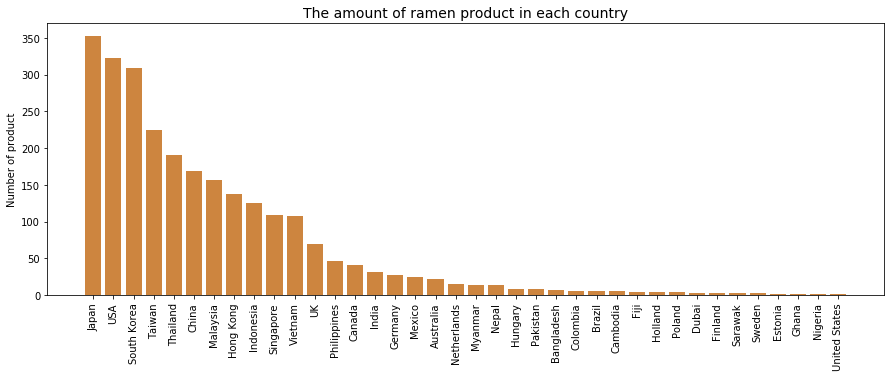

In [12]:
# Bar chart of the amount of ramen products in each country that got reviewed
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Country variety', data = ramen_variety, color = 'peru')
plt.title( 'The amount of ramen product in each country', fontsize=14)
plt.ylabel('Number of product')
plt.xticks(rotation = 90)
plt.show()

### 2. The popular styles of ramen in each country

In [13]:
# Count number of style in each country
ramen_style = ramen_data.groupby(['Country','Style']).agg({'Variety':'count'})
ramen_style = ramen_style.reset_index()
ramen_style.head()

,Country,Style,Variety
0,Australia,Cup,17
1,Australia,Pack,5
2,Bangladesh,Pack,7
3,Brazil,Cup,2
4,Brazil,Pack,3


In [14]:
# Find the unique ramen styles
style_name = sorted(ramen_style['Style'].unique())
print(style_name)

['Bar', 'Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Tray']


In [15]:
# Not every styles were produce in every countries,thus, those styles were not present in the table
# Create the index of every styles in each country and add count number 0
# by create dummie column, merge and fill the NaN with 0
pattern = pd.DataFrame({'dummie' : [0]*266}, \
                       index = pd.MultiIndex.from_product([ramen_coun['Country'], style_name], \
                       names = ['Country', 'Style']))
ramen_style = pd.merge(ramen_style, pattern, how='outer', on=['Country', 'Style'])
ramen_style = ramen_style[['Country', 'Style', 'Variety']].fillna(0)

# Merge ramen_style with ramen_variety to be able to sort with the amount of brand
ramen_style = pd.merge(ramen_style, ramen_variety, how = 'left', on = 'Country')
ramen_style =ramen_style.sort_values(['Country variety','Country', 'Style'], ascending = [False,True, True])

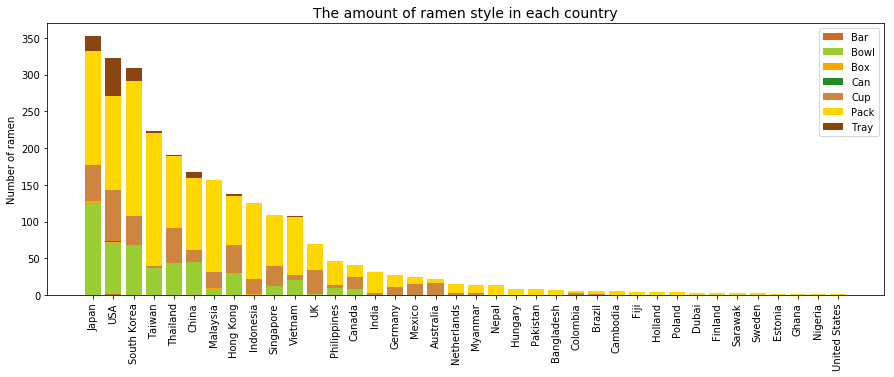

In [16]:
# Create stack bar chart
plt.figure(figsize=(15, 5))
bottom_bar = [0]*38 # for identify the bottom of the bar graph in each style
bar_color = ['chocolate', 'yellowgreen', 'orange', 'forestgreen', 'peru', 'gold', 'saddlebrown']

# Use for loop for plot bar chart and stack the amount of ramen in each ramen style
for i in range(len(style_name)):
    plt.bar('Country', 'Variety', data = ramen_style[ramen_style['Style'] == style_name[i]], \
            bottom = bottom_bar, color = bar_color[i])
    # change the bottom_bar to the the amount of current style for the next loop
    bottom_bar = list(np.add(bottom_bar, ramen_style[ramen_style['Style'] == style_name[i]]['Variety']))

plt.title( 'The amount of ramen style in each country', fontsize=14)
plt.ylabel('Number of ramen')
plt.xticks(rotation = 90)
plt.legend(style_name)
plt.show()

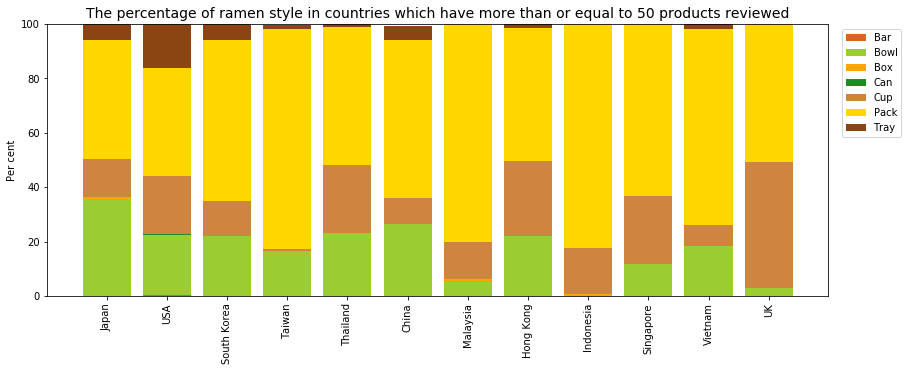

In [17]:
# Create percentage stack bar chart of countries which have more than or equal to 50 products reviewed
# Select only countries which have more than or equal to 50 products reviewed
ramen_per = ramen_style[ramen_style['Country variety'] >= 50].reset_index()

# Create percentage column in ramen_style
ramen_per['Percentage'] = ramen_per['Variety'] * 100 / ramen_per['Country variety']

# Create percentage stack bar chart
plt.figure(figsize=(14, 5))
bottom_bar = [0]*12 # for identify the bottom of the bar graph in each style
for i in range(len(style_name)):
    plt.bar('Country', 'Percentage', data = ramen_per[ramen_per['Style'] == style_name[i]], \
            bottom = bottom_bar, color = bar_color[i])
    bottom_bar = list(np.add(bottom_bar, ramen_per[ramen_per['Style'] == style_name[i]]['Percentage']))

plt.title('The percentage of ramen style in countries which have more than or equal to 50 products reviewed', \
          fontsize=14)
plt.ylabel('Per cent')
plt.xticks(rotation = 90)
plt.legend(style_name,bbox_to_anchor=(1.1, 1))    # move legend box to the right of the graph
plt.show()

### 3. Find the average ramen stars in each brand

In [18]:
# Group ramen_data by Country and Brand column 
# and calculate the mean and median of Stars that each brand received
ramen_stars = ramen_data.groupby(['Country','Brand']).agg({'Stars': ['mean', 'median'], 'Review #': 'count'})
ramen_stars = ramen_stars.reset_index()
ramen_stars.columns = ['Country','Brand','Mean Stars', 'Median Stars', 'Review#']
ramen_stars = ramen_stars.sort_values('Median Stars', ascending = False)

# Create new column for label
ramen_stars['Country Brand'] = ramen_stars['Brand'] + ' (' + ramen_stars['Country'] + ')'
ramen_stars.head()

,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
1,Australia,maggi,5.000000,5.0,1,maggi (Australia)
139,Japan,peyang,5.000000,5.0,1,peyang (Japan)
297,Taiwan,tseng noodles,4.821429,5.0,7,tseng noodles (Taiwan)
172,Malaysia,daddy,5.000000,5.0,1,daddy (Malaysia)
85,India,patanjali,5.000000,5.0,1,patanjali (India)


To make a fair comparison, the average stars should be compared only within the brand that received at least 10 reviews.

In [19]:
# View the top 5 brands with the highest average stars (sort by mean)
ramen_stars_re = ramen_stars[ramen_stars['Review#'] >= 10].reset_index()
ramen_stars_re = ramen_stars_re.sort_values('Mean Stars', ascending = False)
ramen_stars_re.head()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
0,182,Malaysia,mykuali,4.940476,5.000,21,mykuali (Malaysia)
2,397,USA,yamachan,4.568182,4.750,11,yamachan (USA)
1,300,Taiwan,uni-president,4.325000,4.875,10,uni-president (Taiwan)
3,135,Japan,nissin,4.259910,4.500,111,nissin (Japan)
6,196,Malaysia,vit's,4.211538,4.250,13,vit's (Malaysia)


In [20]:
# View the top 5 brands with the lowest average stars (sort by mean)
ramen_stars_re.tail()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
63,343,UK,pot noodle,3.000000,3.25,11,pot noodle (UK)
62,337,UK,batchelors,2.921875,3.25,16,batchelors (UK)
64,334,Thailand,wai wai,2.879545,3.00,22,wai wai (Thailand)
65,12,Canada,mr. noodles,2.016667,2.00,15,mr. noodles (Canada)
66,18,China,baijia,1.250000,0.50,11,baijia (China)


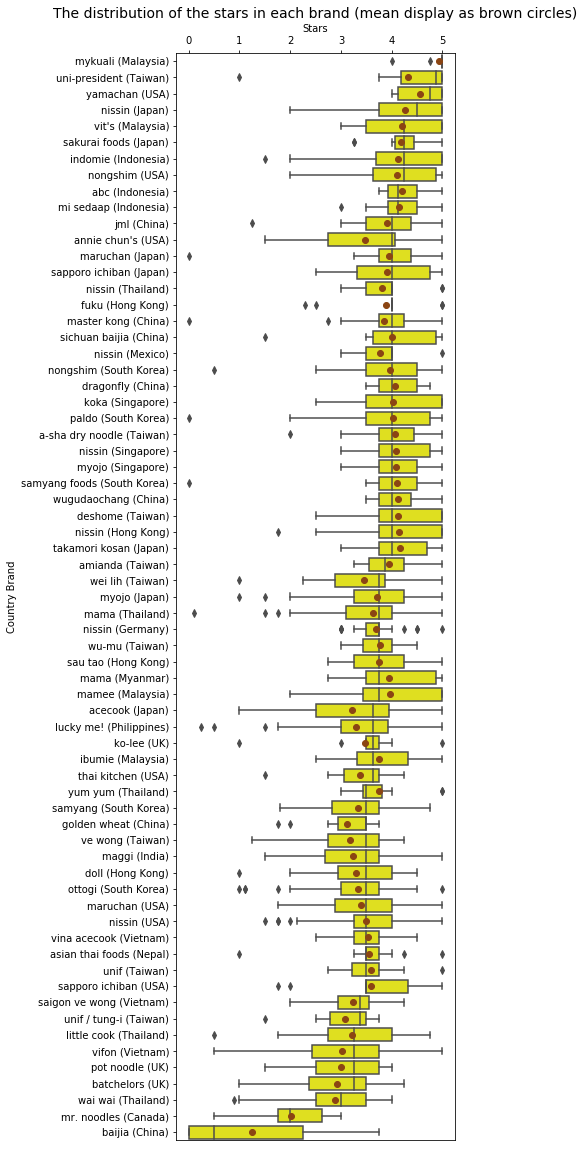

In [21]:
# Create box plot with mean
# Sort by median of the stars for the order in box plot
ramen_stars_re = ramen_stars_re.sort_values('Median Stars', ascending = False)

# Create boxplot
ramen_box = ramen_data[['Country','Brand','Stars']].reset_index()
ramen_box['Country Brand'] = ramen_box['Brand'] + ' (' + ramen_box['Country'] + ')'

# Select only brand in country that in ramen_stars_re
ramen_box = ramen_box[ramen_box['Country Brand'].isin(ramen_stars_re['Country Brand'])]

# Create boxplot
fig, ax = plt.subplots(figsize=(5, 20))
sns.boxplot(x = 'Stars', y = 'Country Brand', data = ramen_box, color = 'yellow',\
            order = ramen_stars_re['Country Brand'], showmeans = True,\
            meanprops = {'marker': 'o','markerfacecolor': 'saddlebrown', 'markeredgecolor': 'saddlebrown'})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.title( 'The distribution of the stars in each brand (mean display as brown circles)', \
          fontsize=14)
plt.show()

### 4. Create word cloud of product name for the top 100 and the bottom 100 ramen products

Find the top 100 and the bottom 100 according to the stars the product received and compare the words that they used to describe the products.

In [22]:
# Rank ramen by Stars column
ramen_sort = ramen_data.sort_values('Stars').dropna(subset = ['Stars'])

# Split into top 100 and bottom 100
ramen_top = ramen_sort.head(100)
ramen_bottom = ramen_sort.tail(100)
ramen_bottom.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
870,1710,chering chang,Instant Non-Fried Noodles Vegetable Curry Flavor,Pack,Taiwan,5.0,NaN
276,2304,maggi,2 Minute Noodles Masala Spicy,Pack,India,5.0,NaN
867,1713,carjen,Otentiq Cheezy Mushroom Instant Noodles,Pack,Malaysia,5.0,NaN
297,2283,nissin,Raoh Pork Bone Soy Soup Noodle,Pack,Japan,5.0,NaN
298,2282,samyang foods,Gold Jjamppong Fried Noodle,Pack,South Korea,5.0,NaN


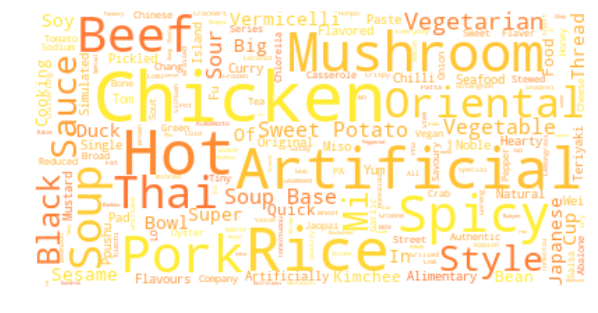

In [23]:
# Join the top 100 ramen product name into a string
ramen_top_str = ramen_top['Variety'].str.cat(sep=',')

# For generate color
def orange_color_func(word, font_size, position, orientation, random_state=None,\
                    **kwargs):
    return "hsl(%d, 100%%, 60%%)" % random.randint(20, 55)

# Plot word cloud of the top 100
stopword_list = ['Noodle', 'Noodles', 'Instant Noodle', 'Instant', 'Flavor', 'Flavour', 'Ramen', 'With']
plt.figure(figsize=(10,6))
top_wordcloud = WordCloud(max_font_size= 50, background_color='white', \
                      prefer_horizontal = 0.7, stopwords = stopword_list).generate(ramen_top_str)
plt.imshow(top_wordcloud.recolor(color_func = orange_color_func, random_state = 3), interpolation='bilinear')
plt.axis('off')
plt.show()

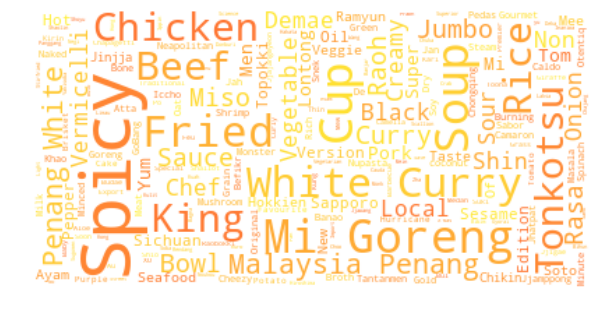

In [24]:
# Join the bottom 100 ramen product name into a string
ramen_bottom_str = ramen_bottom['Variety'].str.cat(sep=',')

# Plot word cloud of the bottom 100
plt.figure(figsize=(10,6))
wordcloud_bottom = WordCloud(max_font_size= 50, background_color='white', \
                      prefer_horizontal = 0.7, stopwords = stopword_list).generate(ramen_bottom_str)
plt.imshow(wordcloud_bottom.recolor(color_func = orange_color_func, random_state = 3), interpolation = 'bilinear')
plt.axis('off')
plt.show()

**References**

Pandas
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_product.html#pandas.MultiIndex.from_product
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex_like.html#pandas.DataFrame.reindex_like
* https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values
* https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Matplotlib
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
* https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
* https://matplotlib.org/3.1.3/api/markers_api.html
* https://stackoverflow.com/questions/14406214/moving-x-axis-to-the-top-of-a-plot-in-matplotlib

Seaborn
* https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html
* https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
* https://stackoverflow.com/questions/54132989/is-there-a-way-to-change-the-color-and-shape-indicating-the-mean-in-a-seaborn-bo
* https://stackoverflow.com/questions/52487352/python-seaborn-how-to-add-mean-into-boxplot-visualization


Word Cloud creation
* https://www.datacamp.com/community/tutorials/wordcloud-python
* https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html